In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, "..")

In [3]:
def display_dictionary(dic_plot):
    """
    Muestra los elementos del diccionario,
    de manera sencilla.
    """
    print("--- ELEMENTOS DEL DICCIONARIO ---")
    # Show the dictionary entries
    for key, value in dic_plot.items():
        if type(value) is dict and "x" in value.keys():
            value = "< Dictionary to plot >"
        print(key, "---", value)


def plot_dictionary_simul(dic_plot):
    """
    Grafica el diccionario
    """
    print("--- CÓMO DEBERÍA VERSE ---")
    
    plt.figure(dpi=120)

    plt.plot(dic_plot["line"]["x"], dic_plot["line"]["y"], color="orange")
    legend = ["Ajuste"]

    if "points" in dic_plot.keys():
        plt.plot(dic_plot["points"]["x"], dic_plot["points"]["y"], "r.")
        legend += ["Datos empíricos"]

    plt.ylabel(dic_plot["ylabel"])
    plt.xlabel(dic_plot["xlabel"])
    plt.title(dic_plot["title"])
    plt.legend(legend)

    plt.show()
    
    
def plot_dictionary_dist(dic_plot):
    """
    Grafica el diccionario
    """
    print("--- CÓMO DEBERÍA VERSE ---")
    
    plt.figure(dpi=120)
    
    legend = [f"Ajuste por {dic_plot['model']}"]

    if "bars" in dic_plot.keys():
        plt.bar(dic_plot["bars"]["x"], dic_plot["bars"]["y"])
        legend += ["Datos empíricos"]

    plt.plot(dic_plot["line"]["x"], dic_plot["line"]["y"], color="orange")

    plt.ylabel(dic_plot["ylabel"])
    plt.xlabel(dic_plot["xlabel"])
    plt.title(dic_plot["title"])
    plt.legend(legend)

    plt.show()
    
    print(f"Parámetros de la distribución de ajuste: {dic_plot['model']}")
    for key, value in dic_plot["model_params"].items():
        print(f"    {key} = {value}")
    print(f"Media = {dic_plot['mean']}")
    print(f"Varianza = {dic_plot['variance']}")

# Simulación

Este apartado ya se ha implementado correctamente en la web. Ignora el gráfico: le faltan detalles.

In [4]:
# Required libraries
from covid_simulation.web.background import check_new_url, download_and_preprocess
from covid_simulation.web.backend import generate_plot_data

# Inputs
path_output_folder = "../outputs"
region = "cadiz"
plot_type = "uci_in"

# Outputs
dic_plot = generate_plot_data(path_output_folder, region, plot_type)

# Visualization
display_dictionary(dic_plot)
plot_dictionary_simul(dic_plot)

--- ELEMENTOS DEL DICCIONARIO ---
ylabel --- Ingresos UCI acumulados
xlabel --- Fecha
line --- < Dictionary to plot >
q05 --- < Dictionary to plot >
q25 --- < Dictionary to plot >
q75 --- < Dictionary to plot >
q95 --- < Dictionary to plot >
vline --- < Dictionary to plot >
title --- cadiz
points --- < Dictionary to plot >
--- CÓMO DEBERÍA VERSE ---


# Distribuciones de tiempo

Funciona muy similar a los gráficos de simulación, pero estos nuevos deben incluir información en forma de texto.

--- ELEMENTOS DEL DICCIONARIO ---
xlabel --- Días
ylabel --- Frecuencia relativa
title --- Tiempo de estancia en el hospital para pacientes no UCI
line --- < Dictionary to plot >
model --- Weibull
model_params --- {'Forma': 1.04, 'Escala': 20.89}
mean --- 20.55801534087277
variance --- 390.01934995727987
--- CÓMO DEBERÍA VERSE ---


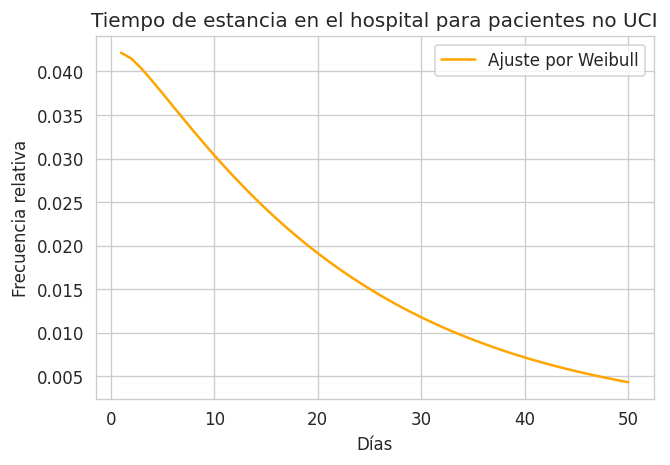

Parámetros de la distribución de ajuste: Weibull
    Forma = 1.04
    Escala = 20.89
Media = 20.55801534087277
Varianza = 390.01934995727987


In [13]:
# Required libraries
from covid_simulation.web.distributions import generate_distribution_data

# Inputs
path_private_csv = "../data/0329_covid_andalucia_private.csv"
distribution_type = "los_no_uci"

# Outputs
dic_plot = generate_distribution_data(path_private_csv, distribution_type)

# Visualization
display_dictionary(dic_plot)    
plot_dictionary_dist(dic_plot)

In [14]:
# Required libraries
from covid_simulation.web.distributions import generate_distribution_data

# Inputs
path_private_csv = "../data/0329_covid_andalucia_private.csv"
distribution_type = "los_uci"

# Outputs
dic_plot = generate_distribution_data(path_private_csv, distribution_type)

# Visualization
display_dictionary(dic_plot)    
plot_dictionary_dist(dic_plot)

--- ELEMENTOS DEL DICCIONARIO ---
xlabel --- Días
ylabel --- Frecuencia relativa
title --- Tiempo de estancia en UCI
model --- Weibull
model_params --- {'Forma': 1.5, 'Escala': 30}
line --- < Dictionary to plot >
mean --- 27.082358788528005
variance --- 338.12125633253874
--- CÓMO DEBERÍA VERSE ---


Parámetros de la distribución de ajuste: Weibull
    Forma = 1.5
    Escala = 30
Media = 27.082358788528005
Varianza = 338.12125633253874


In [15]:
# Required libraries
from covid_simulation.web.distributions import generate_distribution_data

# Inputs
path_private_csv = "../data/0329_covid_andalucia_private.csv"
distribution_type = "hosp_to_uci"

# Outputs
dic_plot = generate_distribution_data(path_private_csv, distribution_type)

# Visualization
display_dictionary(dic_plot)    
plot_dictionary_dist(dic_plot)

--- ELEMENTOS DEL DICCIONARIO ---
xlabel --- Días
ylabel --- Frecuencia relativa
title --- Tiempo entre llegada al hospital y entrada en UCI
model --- Weibull
model_params --- {'Forma': 1.7, 'Escala': 4.5}
line --- < Dictionary to plot >
mean --- 4.015100261246959
variance --- 5.910060251728539
--- CÓMO DEBERÍA VERSE ---


Parámetros de la distribución de ajuste: Weibull
    Forma = 1.7
    Escala = 4.5
Media = 4.015100261246959
Varianza = 5.910060251728539


# Survivability

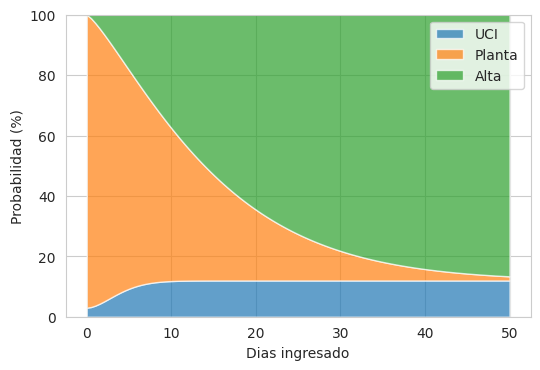

In [8]:
# Required libraries
from covid_simulation.fit_distributions.survivability import get_event_proba, plot_event_proba

# Outputs
x, p_alta_x, p_uci_x, p_planta_x = get_event_proba()

# Visualization
plot_event_proba(x, p_alta_x, p_uci_x)